<a href="https://colab.research.google.com/github/GeoConstantino/Python/blob/master/DesafioRPSGeovani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import numpy as np
import pandas as pd

from google.colab import drive
import matplotlib.pyplot as plt

!pip install ipdb
import ipdb

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel(
    '/content/drive/My Drive/desafio engenheiro(a) de dados analytics (1).xlsx'
    )

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user                 397 non-null    object 
 1   arean1               397 non-null    object 
 2   arean2               397 non-null    object 
 3   count                397 non-null    int64  
 4   mean                 397 non-null    float64
 5   median               397 non-null    float64
 6   std                  390 non-null    object 
 7   day_60th_percentile  397 non-null    float64
 8   day_70th_percentile  397 non-null    float64
 9   day_80th_percentile  397 non-null    float64
 10  day_90th_percentile  397 non-null    object 
 11  day_99th_percentile  397 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 37.3+ KB


In [ ]:
df.head()

,user,arean1,arean2,count,mean,median,std,day_60th_percentile,day_70th_percentile,day_80th_percentile,day_90th_percentile,day_99th_percentile
0,marlene.villegas@papel.com.br,operações,logística,333,106.6,104.6,65.60,170.8,170.8,170.9,170.90,170.90
1,antoni.downes@papel.com.br,tech plataforma,tribo backoffice,58,8.6,0.9,21.60,3.9,4.5,15.5,15.50,117.50
2,finnlay.hough@papel.com.br,relacionamento com clientes,front stone,68,7.4,0.8,11.40,3.5,6.4,44114.0,33.50,33.50
3,emily-jane.maxwell@papel.com.br,tech novos produtos,tribo front,3,0.9,0.9,0.00,0.9,0.9,0.9,0.90,0.90
4,macaulay.chang@papel.com.br,tech novos produtos,tribo investigacoes,24,6.4,6.9,1.70,6.9,6.9,6.9,6.90,6.90


# Dataframe das anomalias!

In [ ]:
df_all_dirty = df.copy()

In [ ]:
ddf = pd.DataFrame()

In [ ]:
# torna nulo valores que não podem ser convertidos para float
# exemplo: 12.231.44

def valid_std_test(value):
    try:
        if re.match(r'^-?\d+(?:\.\d+)?$', str(value)) is None:
            return 99999
        else:
            return float(value)
    
    except ValueError:
        return 99999

# aplica função

df_all_dirty['std'] = df_all_dirty['std'].apply(lambda row: valid_std_test(row))
df_all_dirty['day_60th_percentile'] = df_all_dirty['day_60th_percentile'].apply(lambda row: valid_std_test(row))
df_all_dirty['day_70th_percentile'] = df_all_dirty['day_70th_percentile'].apply(lambda row: valid_std_test(row))
df_all_dirty['day_80th_percentile'] = df_all_dirty['day_80th_percentile'].apply(lambda row: valid_std_test(row))
df_all_dirty['day_90th_percentile'] = df_all_dirty['day_90th_percentile'].apply(lambda row: valid_std_test(row))
df_all_dirty['day_99th_percentile'] = df_all_dirty['day_90th_percentile'].apply(lambda row: valid_std_test(row))

In [ ]:
ddf = ddf.append(df_all_dirty.loc[df_all_dirty['count'] > 100000])
ddf = ddf.append(df_all_dirty.loc[df_all_dirty['mean'] > 40000])
ddf = ddf.append(df_all_dirty.loc[df_all_dirty['median'] > 40000])
ddf = ddf.append(df_all_dirty.loc[df_all_dirty['std'] > 40000])
#ddf = ddf.append(ddf[~ddf['day_90th_percentile'].isin(['3.414.80'])])
#ddf = ddf.append(ddf[~ddf['day_99th_percentile'].isin(['3.414.80'])])
ddf = ddf.append(df_all_dirty.loc[df_all_dirty['day_60th_percentile'] > 100])
ddf = ddf.append(df_all_dirty.loc[df_all_dirty['day_70th_percentile'] > 100])
ddf = ddf.append(df_all_dirty.loc[df_all_dirty['day_80th_percentile'] > 100])
ddf = ddf.append(df_all_dirty.loc[df_all_dirty['day_90th_percentile'] > 100])
ddf = ddf.append(df_all_dirty.loc[df_all_dirty['day_99th_percentile'] > 100])


In [ ]:
ddf.drop_duplicates(inplace=True)

In [ ]:
ddf.head()

,user,arean1,arean2,count,mean,median,std,day_60th_percentile,day_70th_percentile,day_80th_percentile,day_90th_percentile,day_99th_percentile
210,gabriel.chung@tesoura.com.br,tecnologia e operações,oss,302035,0.5,0.4,44105.0,0.5,0.6,0.7,0.8,0.8
223,darcie.hawes@papel.com.br,tech plataforma,tribo transacional,118015,1.3,0.9,2.4,0.9,0.9,0.9,0.9,0.9
11,javier.barrett@papel.com.br,relacionamento com clientes,front stone,469,44120.0,3.5,32.2,7.4,17.6,22.5,28.8,28.8
34,mac.gaines@papel.com.br,serv infraestrutura,datacenter eua,91,44109.0,0.9,8.9,1.2,2.8,6.9,15.8,15.8
57,roxanne.banks@papel.com.br,tecnologia e operações,cross,951,44114.0,0.9,29.4,0.9,0.9,3.7,12.7,12.7


In [ ]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 210 to 375
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user                 121 non-null    object 
 1   arean1               121 non-null    object 
 2   arean2               121 non-null    object 
 3   count                121 non-null    int64  
 4   mean                 121 non-null    float64
 5   median               121 non-null    float64
 6   std                  121 non-null    float64
 7   day_60th_percentile  121 non-null    float64
 8   day_70th_percentile  121 non-null    float64
 9   day_80th_percentile  121 non-null    float64
 10  day_90th_percentile  121 non-null    float64
 11  day_99th_percentile  121 non-null    float64
dtypes: float64(8), int64(1), object(3)
memory usage: 12.3+ KB


### **Limpeza de Dados**


* Filtra "std" < 40000
* Converte "std" para Float, Nulo em quem não puder
* Filtra "mean" < 40000
* Filtra todas "day_*_percentile" <= 100
* Converte percentil para Float, Nulo em quem não puder



In [ ]:
# Limpar colunas de percentual acima de 100%
cols_percentil = ['day_60th_percentile',
                  'day_70th_percentile',
                  'day_80th_percentile',
                  'day_90th_percentile',
                  'day_99th_percentile']

In [ ]:
# Mantendo uma versão do dataframe inalterada
df_dirty = df.copy()

In [ ]:
# funcao para retirar valores de percentil acima de 100 e
# converter em float os válidos

def valid_percentil(value):
    try:
        if float(value) > 100:
                return None
        else:
            return float(value)
    
    except ValueError:
        return None

In [ ]:
# aplica a função "valid_percentil" no dataframe

for col in cols_percentil:
    df_dirty[col] = df_dirty[col].apply(
        lambda row: valid_percentil(row)
        )

In [ ]:
# torna nulo valores que não podem ser convertidos para float
# exemplo: 12.231.44

def valid_std(value):
    try:
        if re.match(r'^-?\d+(?:\.\d+)?$', str(value)) is None:
            return None
        else:
            return float(value)
    
    except ValueError:
        return None

# aplica função

df_dirty['std'] = df_dirty['std'].apply(lambda row: valid_std(row))

In [ ]:
df_dirty.sort_values(by='std', ascending=False, na_position='first').head()

,user,arean1,arean2,count,mean,median,std,day_60th_percentile,day_70th_percentile,day_80th_percentile,day_90th_percentile,day_99th_percentile
160,lily.cummings@papel.com.br,tech novos produtos,tribo front,1,0.9,0.9,NaN,0.9,0.9,0.9,0.9,0.9
232,elisha.huff@papel.com.br,dados e risco transacional,onb & risco,1,0.9,0.9,NaN,0.9,0.9,0.9,0.9,0.9
296,isis.burrows@tesoura.com.br,comercial,comercial hunting oss,1,0.7,0.7,NaN,0.7,0.7,0.7,0.7,0.7
309,manpreet.conner@papel.com.br,tech plataforma,tribo backoffice,1,7.7,7.7,NaN,7.7,7.7,7.7,7.7,7.7
337,milla.millar@papel.com.br,tech plataforma,tribo backoffice,56,433.8,0.9,NaN,3.8,3.8,28.6,NaN,NaN


Podemos observar que existem **muitos valores discrepantes** na coluna "std",
então, **os valores acima de 40000 serão alterados para Nulo**

In [ ]:
df_dirty['std'] = df_dirty['std'].apply(
    lambda row: None if row > 40000 else row
    )

In [ ]:
df_dirty.sort_values(by='mean', ascending=False, na_position='first').head()

,user,arean1,arean2,count,mean,median,std,day_60th_percentile,day_70th_percentile,day_80th_percentile,day_90th_percentile,day_99th_percentile
198,sianna.sinclair@papel.com.br,relacionamento com clientes,helps,101,44130.0,18.4,23.6,18.6,19.7,47.6,48.6,NaN
61,keenan.prentice@papel.com.br,tech plataforma,tribo transacional,1356,44128.0,6.9,116.7,6.9,6.9,6.9,33.3,NaN
140,mateusz.mcgowan@papel.com.br,tech plataforma,tribo transacional,167,44127.0,0.9,55.2,6.9,6.9,16.6,NaN,NaN
152,denzel.blanchard@papel.com.br,relacionamento com clientes,front stone,76,44120.0,7.6,14.5,30.3,30.4,30.5,30.6,34.3
11,javier.barrett@papel.com.br,relacionamento com clientes,front stone,469,44120.0,3.5,32.2,7.4,17.6,22.5,28.8,NaN


As colunas **"count", "mean" e "median"** contém dados que saltam aos olhos pela sua discrepância, como não conheço a base e o método de extração realizada, **optei por não descartar** toda linha que contivesse erros. Esse dataset está com uma qualidade péssima e **esse processo precisaria ser revisado**.

In [ ]:
# Retirando os valores acima de 40k para mean e acima de 60k para count

# Para média eu considerei que o valor de 40000 era absurdo, por isso todo valor
# acima disso foi reduzido a Null
df_dirty['mean'] = df_dirty['mean'].apply(
    lambda row: None if row > 40000 else row
    )

## Mantive coluna COUNT intacta
# Para contagem estamos desconsiderando valores acima de 100.000
#df_dirty['count'] = df_dirty['count'].apply(
    #lambda row: None if row > 660000 else row
    #)

Analisando 50 usuários

In [ ]:
df_count = df_dirty.sort_values(by='count', ascending=False).head(50)
df_mean = df_dirty.sort_values(by='mean', ascending=False).head(50)

## Elencando 5 usuários que mais fizeram consultas e 5 que consultaram mais dias retroativos.

In [ ]:
df_count_5 = df_dirty[['user','count','mean']].sort_values(by='count', ascending=False).head(5)
df_mean_5 = df_dirty[['user','count','mean']].sort_values(by='mean', ascending=False).head(5)

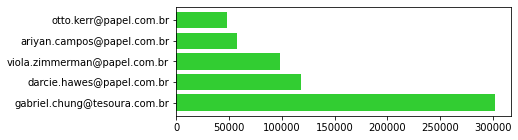

In [ ]:
fig, ax = plt.subplots(figsize = (6,2))
figsize_default = (20,6)
ax.barh(df_count_5['user'], df_count_5['count'], color='limegreen', label='N')

plt.show()

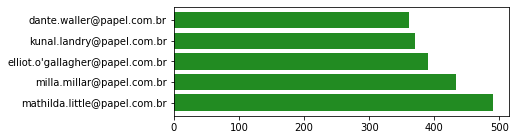

In [ ]:
fig, ax = plt.subplots(figsize = (6,2))

ax.barh(df_mean_5['user'], df_mean_5['mean'],color='forestgreen', label='M')
plt.show()

## Usando Diagrama de Pareto para correlacionar número de consultas e média de período prévio utilizado em consultas.

In [ ]:
#paletadecores
figsize_default = (20,6)

verde2 = 'limegreen'
verde1 = 'darkgreen'
cor_titulo = 'black'
cor_borda = 'indigo'
preto = 'black'
labelsize = 14
titlesize = 22


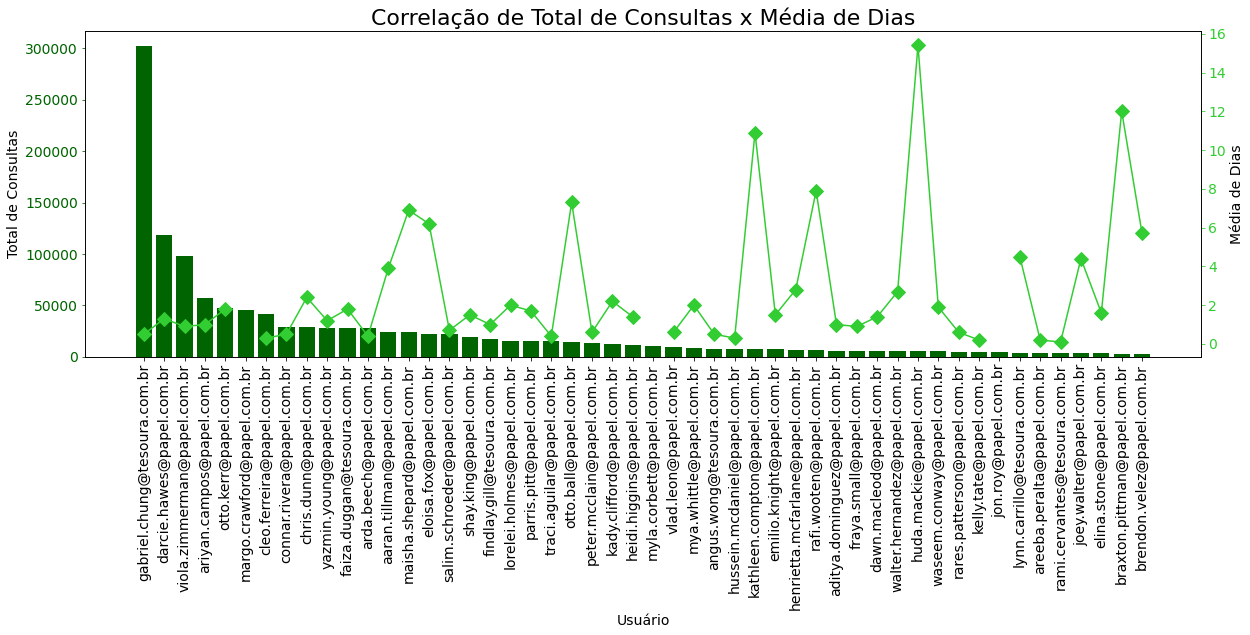

In [ ]:
fig, ax = plt.subplots(figsize=figsize_default)
ax.bar(df_count['user'], df_count['count'], color=verde1)
ax2 = ax.twinx()
ax2.plot(df_count['user'], df_count['mean'], color=verde2, marker="D", ms=10)
#ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis="y", colors=verde1, labelsize=labelsize)
ax.tick_params(axis="x", colors=preto, labelsize=labelsize, labelrotation=90)
ax2.tick_params(axis="y", colors=verde2, labelsize=labelsize)
ax.set_title('Correlação de Total de Consultas x Média de Dias', 
             fontsize=titlesize, color=cor_titulo)
ax.set_ylabel('Total de Consultas', fontsize=labelsize)
ax.set_xlabel('Usuário', fontsize=labelsize)
ax2.set_ylabel('Média de Dias', fontsize=labelsize)
plt.show()

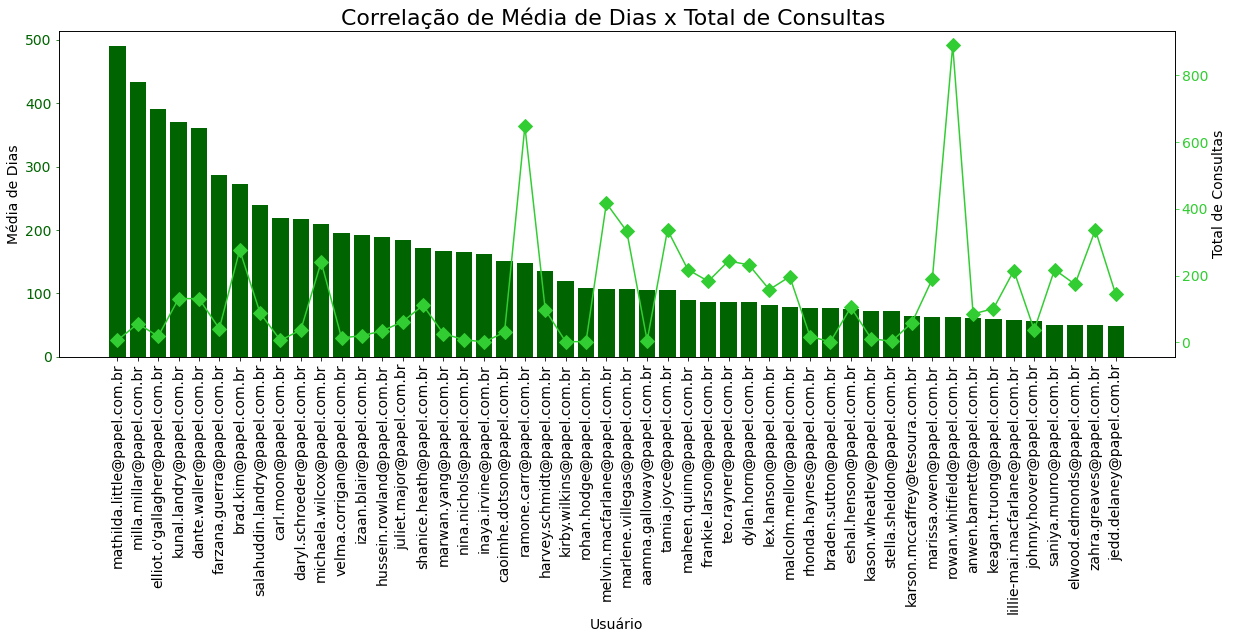

In [ ]:
fig, ax = plt.subplots(figsize=figsize_default)
ax.bar(df_mean['user'], df_mean['mean'], color=verde1)
ax2 = ax.twinx()
ax2.plot(df_mean['user'], df_mean['count'], color=verde2, marker="D", ms=10)
#ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis="y", colors=verde1, labelsize=labelsize)
ax.tick_params(axis="x", colors=preto, labelsize=labelsize, labelrotation=90)
ax2.tick_params(axis="y", colors=verde2, labelsize=labelsize)
ax.set_title('Correlação de Média de Dias x Total de Consultas ', 
             fontsize=titlesize, color=cor_titulo)
ax.set_ylabel('Média de Dias', fontsize=labelsize)
ax.set_xlabel('Usuário', fontsize=labelsize)
ax2.set_ylabel('Total de Consultas', fontsize=labelsize)
plt.show()

## Decidi tentar uma aproximação criando um peso para consultas usando como base a média e o total de consultas

## Peso = (Total de Consultas * Média²) / 100000

In [ ]:
df_dirty['peso'] = ((df_dirty['count'] * (df_dirty['mean'] * df_dirty['mean'])) / 100000)

# Seria necessário estabelecer critério válido de peso das queryes

#df_dirty['peso'] = ((df_dirty['count'] * df_dirty['mean']) / 1000)

#df_dirty['peso'] = ((df_dirty['count'] * df_dirty['median']) / 1000)

#df_dirty['peso'] = ((df_dirty['count'] * df_dirty['mean']) / 1000) 
#                    + ((df_dirty['count'] * df_dirty['median']) / 1000)

In [ ]:
df_peso_all = df_dirty.sort_values(by='peso', ascending=False)


In [ ]:
# Princípio de Pareto diz que 80% dos erros são causados por 20% dos problemas

pareto = int((len(df_dirty.index) / 100) * 20)

df_peso = df_peso_all.head(pareto)

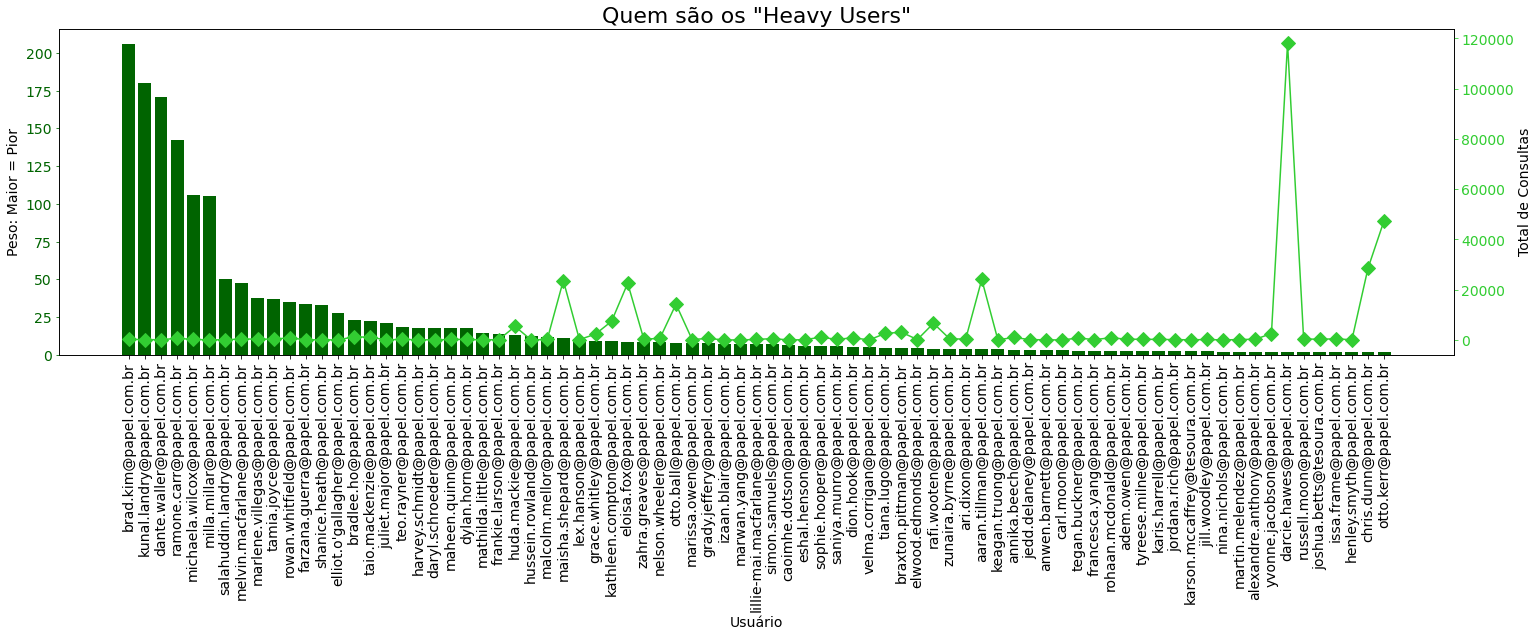

In [ ]:
figsize_default = (25,6)

fig, ax = plt.subplots(figsize=figsize_default)
ax.bar(df_peso['user'], df_peso['peso'], color=verde1)
ax2 = ax.twinx()
ax2.plot(df_peso['user'], df_peso['count'], color=verde2, marker="D", ms=10)
#ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis="y", colors=verde1, labelsize=labelsize)
ax.tick_params(axis="x", colors=preto, labelsize=labelsize, labelrotation=90)
ax2.tick_params(axis="y", colors=verde2, labelsize=labelsize)
ax.set_title('Quem são os "Heavy Users"', 
             fontsize=titlesize, color=cor_titulo)
ax.set_ylabel('Peso: Maior = Pior', fontsize=labelsize)
ax.set_xlabel('Usuário', fontsize=labelsize)
ax2.set_ylabel('Total de Consultas', fontsize=labelsize)
plt.show()


Usando o dataframe **df_peso** que está em um estado de limpeza **aceitável**, vamos agrupar os dados por área

In [ ]:
df_areas = df_peso.copy()

In [ ]:
df_arean1 = df_areas.groupby(by=["arean1"]).sum()
df_areanx = df_areas.groupby(by=["arean1","arean2"]).sum()

In [ ]:
df_arean1 = df_arean1.sort_values(by='peso', ascending=False).reset_index()
df_areanx = df_areanx.sort_values(by='peso', ascending=False).reset_index()

In [ ]:
df_arean1


,arean1,count,mean,median,std,day_60th_percentile,day_70th_percentile,day_80th_percentile,day_90th_percentile,day_99th_percentile,peso
0,relacionamento com clientes,4820,1102.4,847.6,1722.3,311.3,305.7,529.0,210.7,0.0,446.148311
1,logística,2476,1612.7,744.7,2110.3,406.8,218.5,125.9,223.7,80.8,375.138593
2,tecnologia e operações,4297,614.2,475.3,745.8,171.7,190.6,165.9,218.9,0.0,264.885251
3,tech plataforma,200988,859.5,184.2,711.1,275.6,375.7,210.9,217.9,171.3,241.238143
4,operação produtos financeiros,285,1205.9,1068.4,1403.6,163.0,54.6,0.0,0.0,0.0,134.626365
5,operações,7946,200.0,169.5,188.6,71.4,7.0,7.0,35.6,0.0,57.451815
6,serv infraestrutura,105879,162.8,48.7,424.8,50.7,75.2,105.2,115.4,104.5,48.528904
7,dados e risco transacional,490,393.7,207.2,382.7,153.5,186.1,121.4,150.6,90.8,39.280558
8,serv seguranca da informacao,231,580.9,560.4,493.9,45.5,77.8,0.0,0.0,0.0,33.672802
9,tesouraria,6,490.0,478.4,209.6,0.0,0.0,0.0,0.0,0.0,14.406000


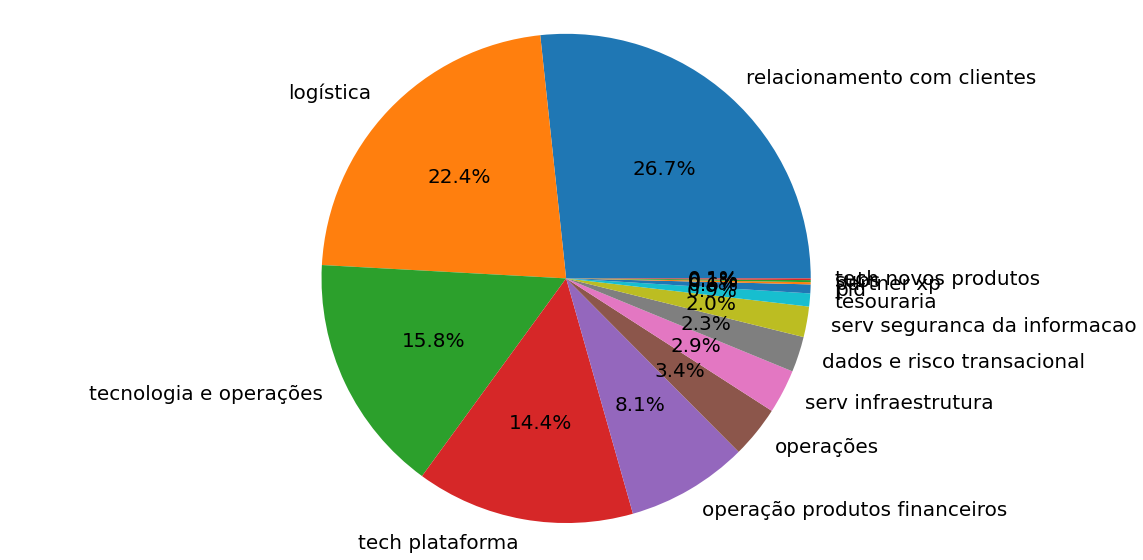

In [ ]:

fig1, ax1 = plt.subplots(figsize=(20,10))
ax1.pie(df_arean1['peso'], labels=df_arean1['arean1'], autopct='%1.1f%%', 
        textprops={'fontsize': 20}, startangle=0)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
# Definindo os Alunos

## Descobrindo os 10 alunos

In [ ]:
# Cria uma coluna de identificaçao concatenando AreaN1 e AreaN2
df_peso_all['arean0'] = df_peso_all['arean1'] + " - " + df_peso_all['arean2']

df_peso_all = df_peso_all.fillna(0)

# Monta lista de áreas que consideramos como mais pesadas na hora de consultar
# a base do Splunk

# A proposta elaborada foi de 80% das áreas mais pesadas + 20% das mais leves

df_lista_areas = df_peso_all[['arean0','arean1','arean2','count','peso']] \
                            .groupby(['arean0'],sort=False).sum().reset_index()


lista_areas_maior_peso = df_lista_areas.iloc[:8,:]['arean0'].tolist()
lista_areas_menor_peso = df_lista_areas.iloc[-2:,:]['arean0'].tolist()

lista_areas = lista_areas_maior_peso + lista_areas_menor_peso



lista_areas

['tecnologia e operações - cross',
 'relacionamento com clientes - front stone',
 'logística - last mile - central',
 'relacionamento com clientes - helps',
 'tech plataforma - tribo backoffice',
 'operação produtos financeiros - -',
 'tech plataforma - tribo transacional',
 'operações - logística',
 'comercial - comercial hunting oss',
 'serv infraestrutura - datacenter eua']

In [ ]:
# Seleciona o usuário que mais gerou peso na base do Splunk por cada área
# apontada.

df_classe = pd.DataFrame()
for i in lista_areas:
    df_aluno = df_peso_all.loc[df_peso_all['arean0'] == i].head(1)
    df_classe = df_classe.append(df_aluno, ignore_index=True)

In [ ]:
df_classe.drop(columns="arean0", inplace=True)

In [ ]:
df_classe

,user,arean1,arean2,count,mean,median,std,day_60th_percentile,day_70th_percentile,day_80th_percentile,day_90th_percentile,day_99th_percentile,peso
0,brad.kim@papel.com.br,tecnologia e operações,cross,277,272.5,373.6,161.4,0.0,0.0,0.0,0.0,0.0,205.689812
1,kunal.landry@papel.com.br,relacionamento com clientes,front stone,131,370.8,513.4,262.2,0.0,0.0,0.0,0.0,0.0,180.115358
2,dante.waller@papel.com.br,logística,last mile - central,131,360.9,379.3,83.5,0.0,0.0,0.0,0.0,0.0,170.625941
3,ramone.carr@papel.com.br,relacionamento com clientes,helps,648,148.1,29.9,480.8,39.4,60.6,99.9,0.0,0.0,142.129793
4,milla.millar@papel.com.br,tech plataforma,tribo backoffice,56,433.8,0.9,0.0,3.8,3.8,28.6,0.0,0.0,105.382166
5,salahuddin.landry@papel.com.br,operação produtos financeiros,-,88,238.9,46.1,308.8,63.7,0.0,0.0,0.0,0.0,50.224425
6,melvin.macfarlane@papel.com.br,tech plataforma,tribo transacional,417,106.6,64.9,127.2,71.7,93.6,0.0,0.0,0.0,47.386045
7,marlene.villegas@papel.com.br,operações,logística,333,106.6,104.6,65.6,0.0,0.0,0.0,0.0,0.0,37.840655
8,isis.burrows@tesoura.com.br,comercial,comercial hunting oss,1,0.7,0.7,0.0,0.7,0.7,0.7,0.7,0.7,0.000005
9,mac.gaines@papel.com.br,serv infraestrutura,datacenter eua,91,0.0,0.9,8.9,1.2,2.8,6.9,15.8,30.6,0.000000


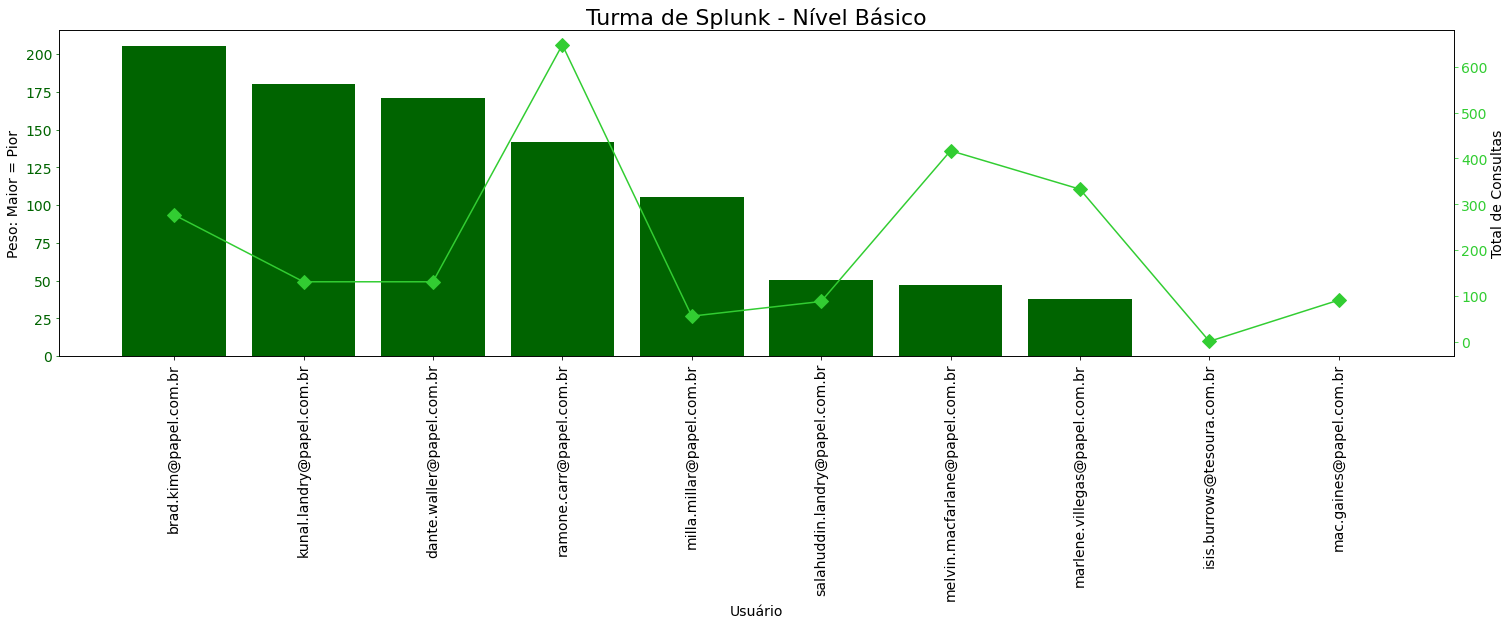

In [ ]:
figsize_default = (25,6)

fig, ax = plt.subplots(figsize=figsize_default)
ax.bar(df_classe['user'], df_classe['peso'], color=verde1)
ax2 = ax.twinx()
ax2.plot(df_classe['user'], df_classe['count'], color=verde2, marker="D", ms=10)
#ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis="y", colors=verde1, labelsize=labelsize)
ax.tick_params(axis="x", colors=preto, labelsize=labelsize, labelrotation=90)
ax2.tick_params(axis="y", colors=verde2, labelsize=labelsize)
ax.set_title("Turma de Splunk - Nível Básico", 
            fontsize=titlesize, color=cor_titulo)
ax.set_ylabel('Peso: Maior = Pior', fontsize=labelsize)
ax.set_xlabel('Usuário', fontsize=labelsize)
ax2.set_ylabel('Total de Consultas', fontsize=labelsize)
plt.show()

In [ ]:
print('Obrigado!')

Obrigado!
